<a href="https://colab.research.google.com/github/azizhaamza/Projet_NLP/blob/main/predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Importation des bibliothèques et data visualization</h1>**

In [ ]:
#Pandas est une bibliothèque de manipulation de données en Python, qui permet notamment de créer et manipuler des tableaux de données appelés "dataframes".
import pandas as pd
#Cette instruction permet d'importer la bibliothèque Natural Language Toolkit (NLTK) en Python.
# NLTK est une bibliothèque de traitement du langage naturel qui offre des outils pour l'analyse de texte.
import nltk
#Cette instruction permet d'importer le corpus de stop words de NLTK. Les stop words sont des mots courants qui n'apportent pas beaucoup de sens dans un texte
# et qui peuvent être supprimés pour améliorer la qualité de l'analyse.
from nltk.corpus import stopwords
#Cette instruction permet d'importer la classe WordNetLemmatizer de NLTK. La lemmatisation est un processus qui consiste à ramener les mots à
# leur forme canonique (lemme) pour faciliter l'analyse.
from nltk.stem import WordNetLemmatizer
 #Cette instruction permet d'importer la fonction word_tokenize de NLTK, qui permet de diviser un texte en mots ou en tokens.
from nltk.tokenize import word_tokenize
#Cette instruction permet d'importer la fonction train_test_split de la bibliothèque scikit-learn. Cette fonction permet de diviser un ensemble de données
# en un ensemble d'entraînement et un ensemble de test pour l'évaluation d'un modèle.
from sklearn.model_selection import train_test_split
#Cette instruction permet d'importer la fonction accuracy_score de scikit-learn, qui permet de calculer le taux de classification correcte (précision)
#d'un modèle.
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**<h1></h1>**

In [ ]:
df2=pd.read_csv('/content/hotel-reviews.csv')
df2

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


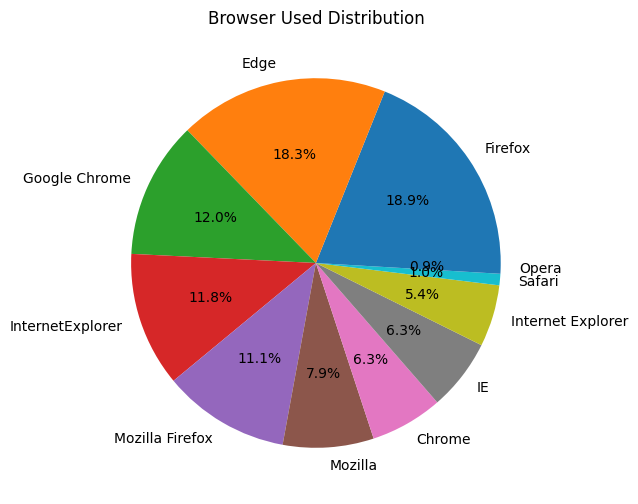

In [ ]:
# Afficher la répartition de chaque valeur pour Browser_Used
plt.figure(figsize=(12,6))
df2['Browser_Used'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Browser Used Distribution')
plt.ylabel('')
plt.show()


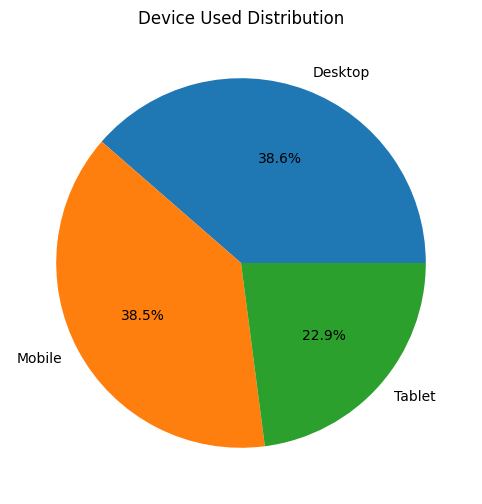

In [ ]:
# Afficher la répartition de chaque valeur pour Device_Used
plt.figure(figsize=(12,6))
df2['Device_Used'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Device Used Distribution')
plt.ylabel('')
plt.show()


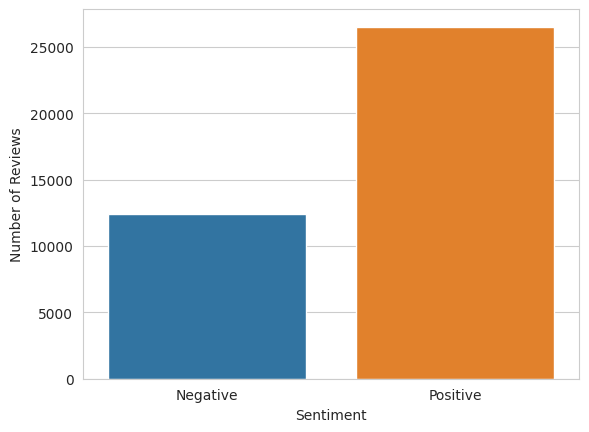

In [ ]:
# Visualization
sns.set_style("whitegrid")

ax = sns.countplot(x="Is_Response", data=df)
ax.set(xticklabels=['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:

# Chargement du fichier CSV
df= pd.read_csv('/content/hotel-reviews.csv')
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [ ]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
df.tail()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy
38931,id49257,The Westin is a wonderfully restored grande da...,Mozilla,Desktop,happy


In [ ]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [ ]:
df.shape

(38932, 5)

In [ ]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38927    False
38928    False
38929    False
38930    False
38931    False
Length: 38932, dtype: bool

In [ ]:
df['Description']

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April -- - April -...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok. We paid extra for ...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

**<h1>Data cleaning </h1>**

In [ ]:
# Suppression des colonnes inutiles
df.drop(['User_ID', 'Browser_Used', 'Device_Used'], axis=1, inplace=True)

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

In [ ]:
df

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


**<h1>Word Cloud visualization</h1>**

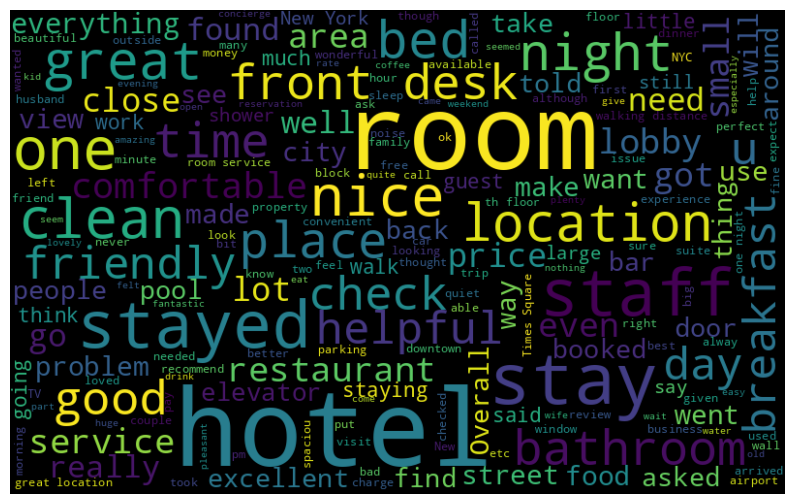

In [ ]:
#Ce code collecte tous les mots positifs et négatifs, puis crée un cloudword pour chaque ensemble de mots.
#Les cloudwords nous permettent de visualiser facilement les mots les plus fréquents dans chaque ensemble de critiques,
# ce qui peut nous aider à mieux comprendre les sentiments des critiques.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Collecter tous les mots positifs et négatifs
all_words = ' '.join([text for text in df['Description']])

# Créer une visualisation des mots les plus fréquents
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


<h1>**Pretrained model**</h2>

In [ ]:
#Installez la bibliothèque spaCy et téléchargez le modèle pré-entraîné pour le traitement du langage naturel
#en exécutant les commandes suivantes dans votre environnement virtuel :
!pip install spacy
!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-03 15:10:08.056399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 15:10:09.289095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Importez la bibliothèque spaCy et chargez le modèle pré-entraîné en exécutant les commandes suivantes en haut de votre code :
import spacy
#chargement du modèle linguistique pré-entraîné en anglais 'en_core_web_sm'
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Modifiez la fonction clean_text pour inclure le traitement spaCy :
# la bibliothèque de re pour supprimer la ponctuation du texte en remplaçant tout ce qui n'est pas un caractère alphabétique ou un espace par une chaîne vide.
# Cette étape permet de simplifier le texte et de se concentrer sur les mots importants.
import re
# Cette fonction clean_text effectue diverses étapes de prétraitement sur un texte donné en utilisant la bibliothèque Spacy
def clean_text(text):
    # Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convertir en minuscules dont le but de normaliser le texte et de rendre la comparaison des mots plus facile.
    text = text.lower()

    # Supprimer les chiffres ce qui permet de se concentrer uniquement sur les mots et de retirer les nombres.
    text = re.sub(r'\d', '', text)

    # Lemmatisation: La lemmatisation est une étape de prétraitement qui consiste à convertir chaque mot en sa forme canonique (ou lemme)
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc])

    # Supprimer les espaces supplémentaires
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
#cette instruction prend du temp vu la qunatite à traiter mais elle est la plus rapide parmi ce qu'on avait testet
#Utilisez la fonction clean_text pour nettoyer la colonne Description du dataframe :
df['Description'] = df['Description'].apply(clean_text)


-La méthode apply() de Pandas est utilisée pour appliquer la fonction à chaque élément de la colonne.<br>
-NB  cette étape de nettoyage est importante pour améliorer la qualité des données et faciliter leur analyse ultérieure,car elle permet de réduire le bruit et de se concentrer sur les informations pertinentes dans le texte.


In [ ]:
#Créez un vecteur pour chaque description à l'aide de la fonction TfidfVectorizer de la bibliothèque scikit-learn :
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
# Cette méthode calcule la fréquence des mots dans chaque texte de la colonne "Description" et les transforme en vecteurs numériques normalisés.
X = vectorizer.fit_transform(df['Description'])
y = df['Is_Response']


<h1>Machine learning </h1>

In [ ]:
#Divisez les données en ensembles d'entraînement et de test :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#on a utilisé une régression logistique pour classifier des données en "happy" ou "not happy".
#La régression logistique est un type de modèle d'apprentissage supervisé utilisé pour la classification binaire.
#Entraînez un modèle de régression logistique :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

pretrained model

In [ ]:
# Évaluez la précision du modèle sur l'ensemble de test :
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8781302170283807


In [ ]:
#Utilisez le modèle entraîné pour prédire le sentiment d'une nouvelle description :
new_text = "I hadn't a great stay at this hotel, the staff was very unfriendly and the room was not clean and uncomfortable."
new_text = clean_text(new_text)
new_X = vectorizer.transform([new_text])
prediction = model.predict(new_X)[0]
print(prediction)


not happy


In [ ]:
#Utilisez le modèle entraîné pour prédire le sentiment d'une nouvelle description :
new_text = "I had a great stay at this hotel, the staff was very friendly and the room was clean and comfortable."
new_text = clean_text(new_text)
new_X = vectorizer.transform([new_text])
prediction = model.predict(new_X)[0]
print(prediction)

happy


In [ ]:
df['Description'].iloc[98]

'my wife and I stay at the buckingham hotel for night in midapril we book via the hotel website and get a rate of plus taxis for the standard room it be wellequippe video player cd kitchnettett safe we stay on the th floor and our room face th street be a bit noisy with the am garbage truck police siren and what have you so if you be sensitive you might want to chose a room face the back otherwise the hotel be flawless the desk downstair amenity clean the bed everything just perfect and we be pretty fuzzy free wireless in the comfortable business center but a charge of if you want it in your room faboulus value for the location and standard highly recommend and a nice breakfast deli just next door'

In [ ]:
new_text1=df['Description'].iloc[98]


In [ ]:
new_X = vectorizer.transform([new_text1])
prediction = model.predict(new_X)[0]
print(prediction)

happy


In [ ]:
new_text2=df['Description'].iloc[2]

In [ ]:
new_X = vectorizer.transform([new_text2])
prediction = model.predict(new_X)[0]
print(prediction)

not happy


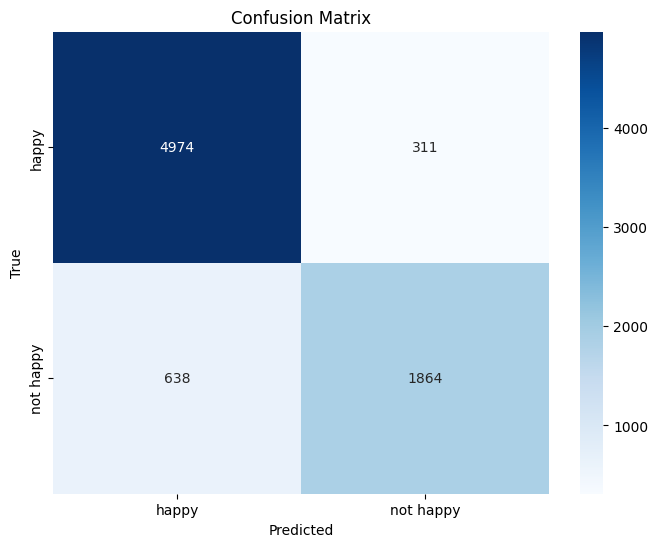

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['happy', 'not happy'], yticklabels=['happy', 'not happy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


4974 instances ont été correctement classées comme appartenant à la première classe (vrais positifs).<br>
311 instances ont été classées de manière incorrecte comme appartenant à la deuxième classe, alors qu'elles appartiennent en réalité à la première classe (faux positifs).<br>
638 instances ont été classées de manière incorrecte comme appartenant à la première classe, alors qu'elles appartiennent en réalité à la deuxième classe (faux négatifs).<br>
1864 instances ont été correctement classées comme appar
4974 instances ont été correctement classées comme appartenant à la première classe (vrais positifs).<br>
311 instances ont été classées de manière incorrecte comme appartenant à la deuxième classe, alors qu'elles appartiennent en réalité à la première classe (faux positifs).<br>
638 instances ont été classées de manière incorrecte comme appartenant à la première classe, alors qu'elles appartiennent en réalité à la deuxième classe (faux négatifs).<br>
1864 instances ont été correctement classées comme
appartenant à la deuxième classe (vrais négatifs).<br>


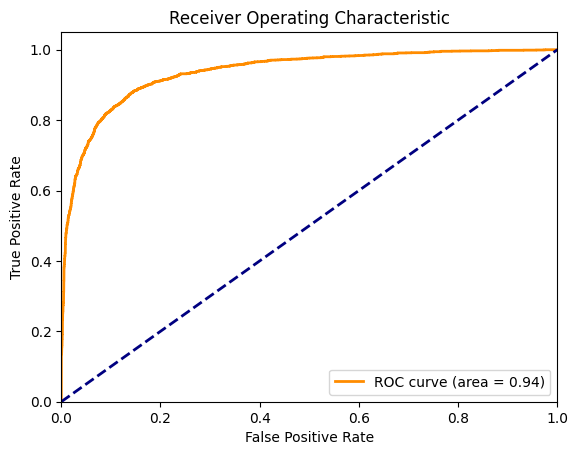

In [ ]:
#La courbe ROC (Receiver Operating Characteristic) est un graphique utilisé pour évaluer la performance d'un modèle de classification binaire.
# La courbe ROC représente la capacité du modèle à faire la distinction entre les classes positives et négatives.
#Ce code utilise la bibliothèque scikit-learn pour évaluer les performances d'un modèle de classification binaire à l'aide de la courbe ROC (Receiver Operating Characteristic).
from sklearn.preprocessing import LabelEncoder

# Encoder les labels "happy" et "not happy" en 1 et 0
le = LabelEncoder()
y_test = le.fit_transform(y_test)

from sklearn.metrics import roc_curve, auc # permet de calculer les taux de faux positifs et les taux de vrais positifs pour différentes valeurs de seuil de classification, tandis que auc permet de calculer l'aire sous la courbe ROC.
import matplotlib.pyplot as plt

# Calculer la probabilité de prédiction pour l'ensemble de test
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculer les taux de faux positifs et les taux de vrais positifs
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculer l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
#Une courbe ROC avec une surface sous la courbe (ROC AUC) de 0,94 indique une performance élevée du modèle de classification binaire.
# En général, une valeur de ROC AUC supérieure à 0,5 est considérée comme meilleure que la prédiction aléatoire,
#tandis qu'une valeur proche de 1 indique une excellente performance.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus
from IPython.display import Image

# Diviser le jeu de données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instancier le modèle d'arbre de décision
dtc = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
dtc.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = dtc.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculer la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)

Accuracy: 0.7514554794520548
Confusion matrix:
 [[6619 1368]
 [1535 2158]]
